# Esercitazione: Computer Vision

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

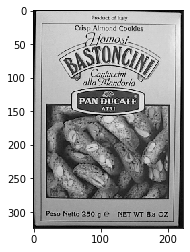

In [2]:
box = cv.imread("images/box.png", 0)
plt.imshow(box, cmap="gray")
plt.show()

Si usa la libreria `popen Computer Vision` per calcolare i punti di interesse (keypoints).

In [3]:
sift = cv.xfeatures2d.SIFT_create()
(kps1, features1) = sift.detectAndCompute(box, None)
len(kps1)

604

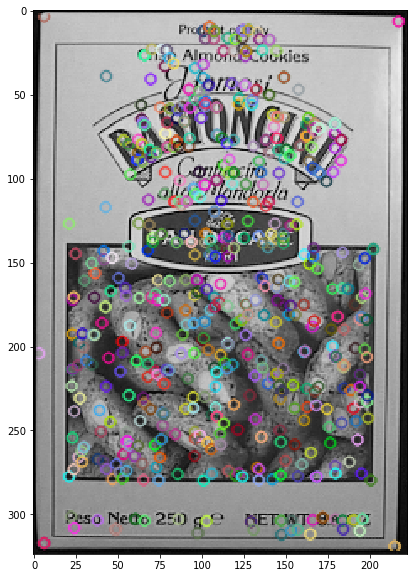

In [4]:
plt.figure(figsize=(10, 10))
plt.imshow(cv.drawKeypoints(box, kps1, None))

plt.show()

Si carica una seconda foto per verificare se compare la scatola all'interno.

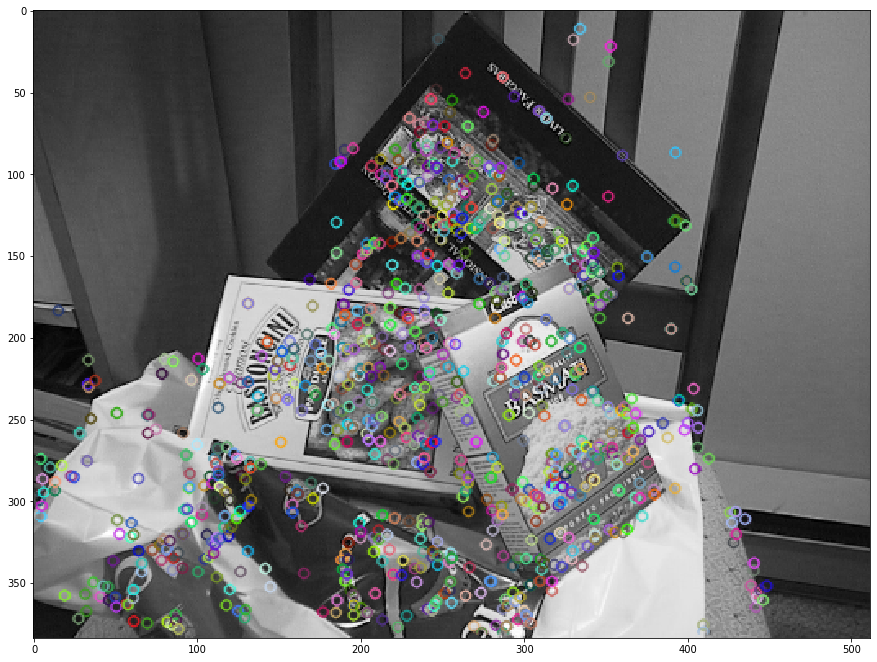

In [5]:
scene = cv.imread("images/box_in_scene.png", 0)
(kps2, features2) = sift.detectAndCompute(scene, None)
plt.figure(figsize=(15, 15))
plt.imshow(cv.drawKeypoints(scene, kps2, None))
plt.show()

In [6]:
bf = cv.BFMatcher(crossCheck=True)  # brute force matcher
matches = bf.match(features1, features2)
len(matches)

398

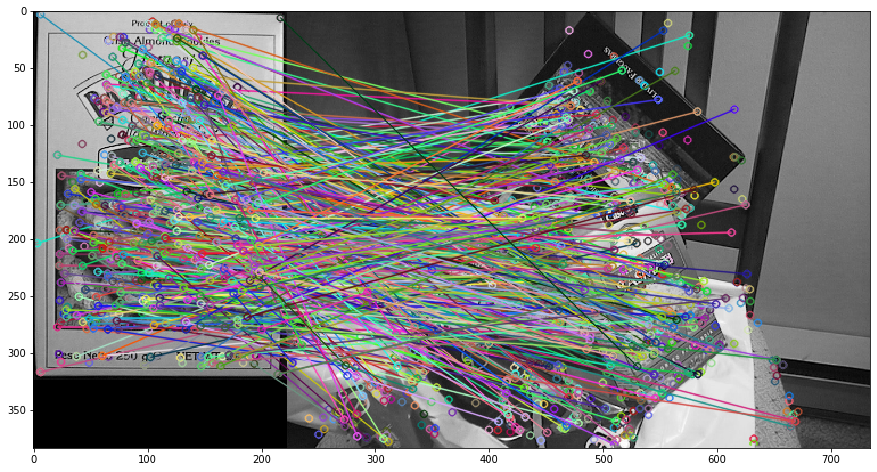

In [7]:
plt.figure(figsize=(15, 15))
plt.imshow(cv.drawMatches(box, kps1, scene, kps2, matches, None))
plt.show()

È pieno di falsi positivi: bisogna eliminare match con una distanza troppo elevata (matches[0].distance).
Nell'esempio si considerano i 100 match con distanza minore.

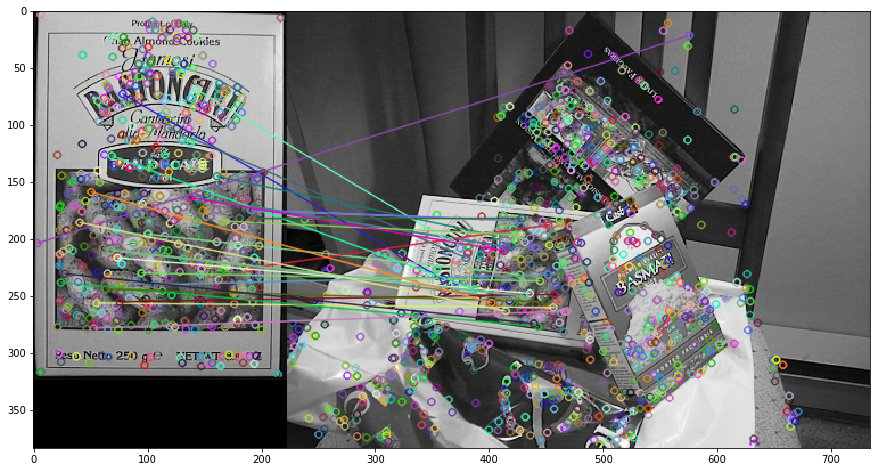

In [8]:
matches = sorted(matches, key=lambda m: m.distance)
plt.figure(figsize=(15, 15))
plt.imshow(cv.drawMatches(box, kps1, scene, kps2, matches[0:30], None))
plt.show()

# Esempio con le [barche](https://www.youtube.com/watch?v=htNI6BKjLlc)

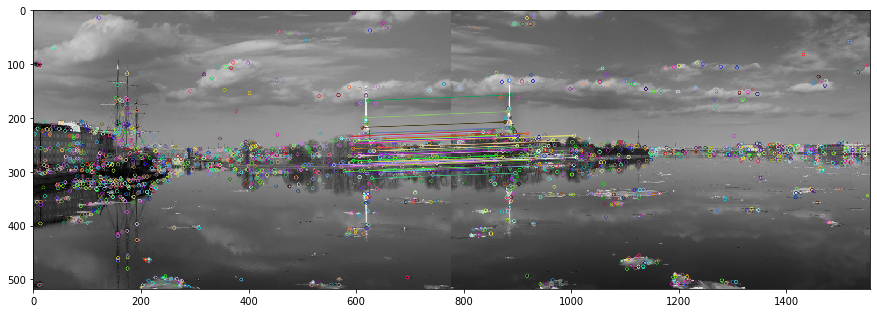

In [9]:
img1 = cv.imread("images/boat1.jpg", 0)
img2 = cv.imread("images/boat3.jpg", 0)

(kps_boat1, features_boat1) = sift.detectAndCompute(img1, None)
(kps_boat2, features_boat2) = sift.detectAndCompute(img2, None)

bf_boat = cv.BFMatcher(crossCheck=True)
matches_boat = bf.match(features_boat1, features_boat2)
matches_boat = sorted(matches_boat, key=lambda m: m.distance)

plt.figure(figsize=(15, 15))
plt.imshow(cv.drawMatches(img1, kps_boat1, img2, kps_boat2, matches_boat[0:50], None))
plt.show()

Si genera una matrice $3 \times 3$ che dichiara la trasformazione che un'immagine deve subire per adagiarsi alla seconda in modo perfetto (dati i match).

In [10]:
matched_points = np.array([[kps_boat1[m.queryIdx].pt for m in matches_boat],
                           [kps_boat2[m.trainIdx].pt for m in matches_boat]])

homo = cv.findHomography(matched_points[1, :], matched_points[0, :], method=cv.RANSAC)[0]
homo

array([[ 5.70149939e-01, -6.14710116e-03,  5.20617643e+02],
       [-1.52895246e-01,  9.21225916e-01,  2.95639256e+01],
       [-5.50931510e-04, -1.40134100e-05,  1.00000000e+00]])

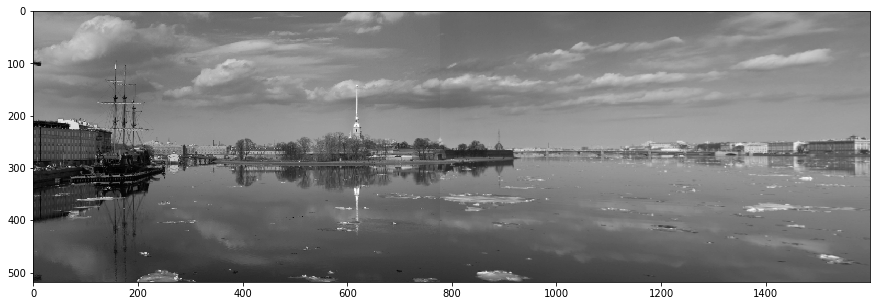

In [11]:
img2_transformed = cv.warpPerspective(img2, homo, (1600, 518))

coords = (int(img1.shape[0] / 2), img1.shape[1] - 1)

diff = np.mean(img1[:, (img1.shape[1] - 200):img1.shape[1]] - \
               img2_transformed[:, (img1.shape[1] - 200):img1.shape[1]])

img2_transformed += int(diff / 2)
img2_transformed[0:img1.shape[0], 0:img1.shape[1]] = img1
        
plt.figure(figsize=(15, 15))
plt.imshow(img2_transformed, cmap="gray")
plt.show()